### **Nombre:** Andrés Felipe Riaño Quintanilla.
### **Cédula:** 1083928808.

# Laboratorio 03

**Librerías:**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative
import sympy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Funciones:**

In [20]:
def J_2D(Theta,X_1, Y):
    '''
    Calcula la función de coste para el caso en el que el único parámetro de la regresión
    es el coeficiente que multiplica las características X^(i).
    
    -------------------------------------------------------------------------------------
    
    INPUT:

    > Theta: arreglo unidimensional de Numpy con diferentes valores del parámetro de la 
    regresión.
    > X_1: arreglo unidimensional de Numpy con los valores de las características (x).
    > Y: arreglo unidimensional de Numpy con los valores de las etiquetas (y).

    OUTPUT:

    > J2D: arreglo unidimensional de Numpy con los valores de la función de coste para X_1
    e Y evaluada en los diferentes valores de Theta.
    '''

    J2D = np.array([0.5*np.mean((theta*X_1-Y)**2.) for theta in Theta])
    
    return J2D

In [21]:
def J_3D(theta0,theta1,X_1,Y):
    '''
    Calcula la función de coste para el caso en el que se tienen dos parámetros, el
    término independiente y el término que multiplica las características x^(i).

    ------------------------------------------------------------------------------------

    INPUT:

    > theta0: arreglo bidimensional de Numpy con los valores del parámetro independiente.
    > theta1: arreglo bidimensional de Numpy con los valores del parámetro que acompaña
    las X^(i).
    > X_1: arreglo unidimensional de Numpy con los valores de las características (x).
    > Y: arreglo unidimensional de Numpy con los valores de las etiquetas (y).

    OUTPUT:

    > J_: arreglo bidimensional de Numpy con los valores de la función de coste para X_1
    e Y evaluada en los diferentes valores de theta0 y theta1.

    '''

    J_ = np.array([[0.5*np.mean((np.array([theta0[i,j],theta1[i,j]])@np.array([np.ones(len(X_1)),X_1])-Y)**2.0) 
                   for i in range(theta0.shape[0])] for j in range((theta0.shape[0]))])
    
    return J_

In [22]:
def GD_1V(x_0,f,alpha,epsilon):
    '''
    Encuentra el valor mínimo de una función de una variable f usando el método  del
    gradiente descendente.

    ---------------------------------------------------------------------------------

    INPUT: 
    
    > x_0: número flotante que representa la primera aproximación de x.
    > f: función de Python a la que se le quiere hallar el mínimo.
    > alpha: número flotante con la razón de aprendizaje del algoritmo.
    > epsilon: número flotante con la tolerancia del algoritmo.
    
    OUTPUT:

    > x_ip1: número flotante con el valor de x encontrado.
    > x_: arreglo unidimensional de Numpy con los diferentes x encontrados en cada
    iteración.
    '''

    x_i1 = lambda x_i,alpha_,f_: x_i - alpha_*derivative(f_,x_i)   
    x_i = x_0
    x_ip1 = x_i1(x_i,alpha,f)
    x_ = [x_ip1]

    while np.abs(f(x_ip1)-f(x_i)) >= epsilon:
    
        x_i = x_ip1   
        x_ip1 = x_i1(x_i,alpha,f)
        x_.append(x_ip1)
    
    return x_ip1,x_

In [23]:
def GD_2V(r_0,f,fx,fy,alpha,epsilon):
    '''
    Encuentra el valor mínimo (x,y) de una función de dos variables f usando el 
    método  del gradiente descendente.

    ---------------------------------------------------------------------------------

    INPUT: 
    
    > r_0: arreglo unidimensional de Numpy que representa la primera aproximación de 
    (x,y).
    > f: función de Python de dos variables a la que se le quiere hallar el mínimo.
    > fx: función de Python de dos variables que representa la derivada parcial de f
    con respecto a x.
    > fx: función de Python de dos variables que representa la derivada parcial de f
    con respecto a y.
    > alpha: número flotante con la razón de aprendizaje del algoritmo.
    > epsilon: número flotante con la tolerancia del algoritmo.
    
    OUTPUT:

    > r_ip1: arreglo unidimensional de Numpy con el valor de (x,y) encontrado.
    > r_: arreglo bidimensional de Numpy con los diferentes (x,y) encontrados en cada
    iteración.
    '''

    r_i1 = lambda r_i,alpha_,fx_,fy_: r_i - alpha_*np.array([fx_(r_i[0],r_i[1]),fy_(r_i[0],r_i[1])])
    r_i = r_0
    r_ip1 = r_i1(r_i,alpha,fx,fy)
    r_ = [r_ip1]

    while np.abs(f(r_ip1[0],r_ip1[1])-f(r_i[0],r_i[1])) >= epsilon:

        r_i = r_ip1   
        r_ip1 = r_i1(r_i,alpha,fx,fy)
        r_.append(r_ip1)

    return r_ip1,r_

In [24]:
def Lin_Reg(r_0,alpha,epsilon,X_1,Y):
    '''
    Obtiene los parámetros de la línea recta de regresión dado un conjunto de datos
    (x,y).

    ---------------------------------------------------------------------------------

    INPUT:

    > r_0: arreglo unidimensional de Numpy que representa la primera aproximación de 
    (x,y) para el método del gradiente descendente.
    > alpha: número flotante con la razón de aprendizaje del algoritmo del gradiente
    descendente.
    > epsilon: número flotante con la tolerancia del algoritmo.
    > X_1: arreglo unidimensional de Numpy con los valores de las características (x).
    > Y: arreglo unidimensional de Numpy con los valores de las etiquetas (y).

    OUTPUT:

    > b: número flotante que representa el intercepto de la recta de regresión.
    > m: número flotante que representa la pendiente de la recta de regresión.
    '''

    J = lambda theta0,theta1: 0.5*np.mean( (np.array([theta0,theta1])@np.array([np.ones(len(X_1)),X_1]) - Y)**2. ) 
    J_theta_0 = lambda theta0,theta1: np.mean( np.array([theta0,theta1])@np.array([np.ones(len(X_1)),X_1]) - Y)
    J_theta_1 = lambda theta0,theta1: np.mean(( np.array([theta0,theta1])@np.array([np.ones(len(X_1)),X_1]) - Y)*X_1)

    b, m = GD_2V(r_0,J,J_theta_0,J_theta_1,alpha,epsilon)[0]

    return b, m

**Solución:**

**1.** Crear un data frame de pandas tal que el conjunto de características y datos etiquetados sean, en ambos casos, los naturales en orden hasta un valor m.

In [25]:
m = 10

X_1 = np.array(range(0,m+1))
Y = np.array(range(0,m+1))
Df = pd.DataFrame({'Y':Y,'X_1':X_1})
Df.head()

,Y,X_1
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


**2.** Crear una función para calcular la función de coste.

Revisar la función `J_2D` en la sección de funciones.

**3.** Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

Text(0.5, 1.0, 'Función de costo unidimensional')

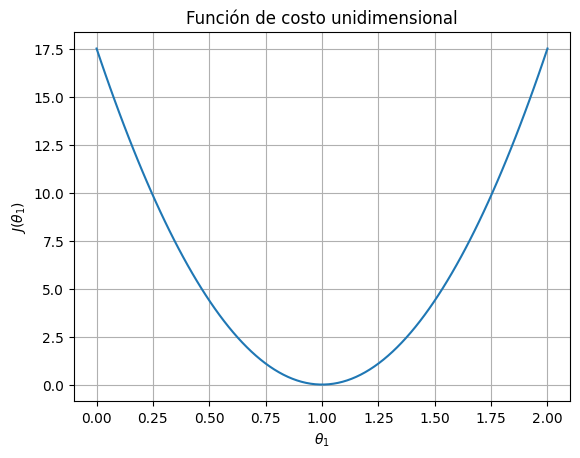

In [26]:
theta = np.linspace(0,2,100)
J = J_2D(theta,Df.X_1,Df.Y)

plt.plot(theta,J)
plt.grid()
plt.xlabel('$\\theta_1$')
plt.ylabel('$J(\\theta_1)$')
plt.title('Función de costo unidimensional')

In [27]:
print('Hay un mínimo en theta_1 = {}.'.format(theta[J==J.min()][0]  ))

Hay un mínimo en theta_1 = 0.98989898989899.


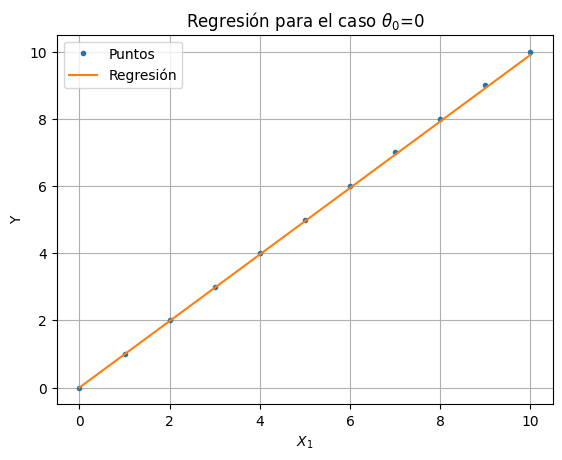

In [28]:
plt.plot(Df.X_1,Df.Y,'.',label='Puntos')
plt.plot(Df.X_1,Df.X_1*theta[J==J.min()][0],'-',label='Regresión')
plt.xlabel('$X_1$')
plt.ylabel('Y')
plt.title('Regresión para el caso $\\theta_0$=0')
plt.legend()
plt.grid()

**4.** Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$. Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

La función construida para este punto es `J_3D`, que se encuentra en la sección de funciones.

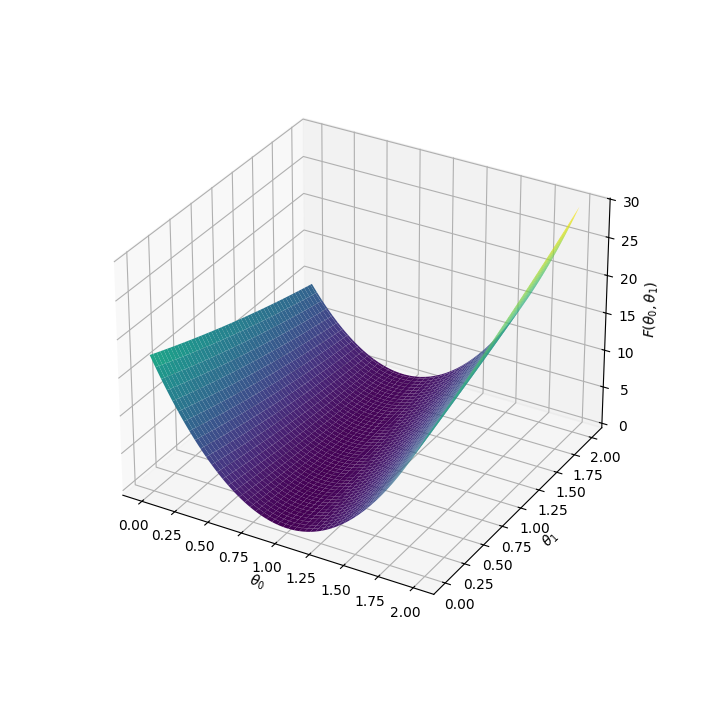

In [29]:
theta0 = np.linspace(0,2,100)
theta1 = np.linspace(0,2,100)
t0, t1 = np.meshgrid(theta0,theta1)
Z = J_3D(t0,t1,X_1,Y)

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(t0, t1, Z, cmap = "viridis")

ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$F(\\theta_0,\\theta_1)$')
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

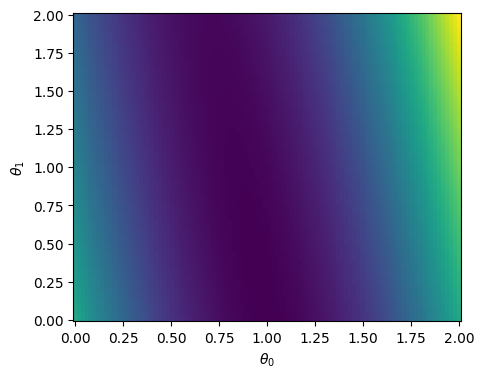

In [30]:
plt.figure(figsize=(5,4))
plt.pcolor(t0, t1, Z, cmap = "viridis")
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.show()

**5.** Encontrar la expresión teórica para la función de coste en el caso 2D y 3D.

Caso 2D:

\begin{equation}
J(\theta)=\frac{1}{2m} \sum_{i=0}^m (  \theta {X_1}^{(i)}- Y^{(i)})^2
\end{equation}

Caso 3D:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 {X_1}^{(i)})- Y^{(i)})^2
\end{equation}

**6.** Construya un algoritmo en el que emplee el gradiente descendente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$.

El algoritmo construido se encuentra dentro de la función `GD_1V` en la sección de funciones. En la próxima celda se probará tal algoritmo para los valores de $\alpha=\left[ 0.001,0.01,0.1 \right]$

C:\Users\User\AppData\Local\Temp\ipykernel_11476\1066397768.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_i1 = lambda x_i,alpha_,f_: x_i - alpha_*derivative(f_,x_i)


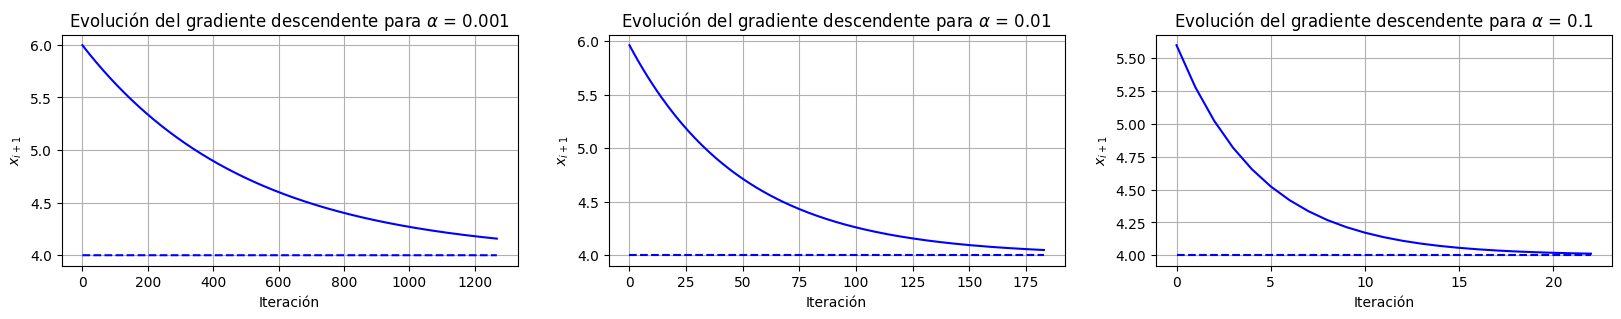

In [31]:
alpha = [0.001,0.01,0.1]
f = lambda x: (x-4)**2.

fig, axis = plt.subplots(ncols = 3, sharex = False, sharey = False, figsize = (20,3))

for i,a in enumerate(alpha):

    X = GD_1V(6,f,a,1e-4)[1]
    axis[i].plot(range(len(X)),X,color='b')
    axis[i].plot(range(len(X)),4*np.ones(len(X)),"--",color='b')
    axis[i].set_title('Evolución del gradiente descendente para $\\alpha$ = {}'.format(a))
    axis[i].set_xlabel('Iteración')
    axis[i].set_ylabel('$x_{i+1}$')
    axis[i].grid()

**7.** Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente:

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

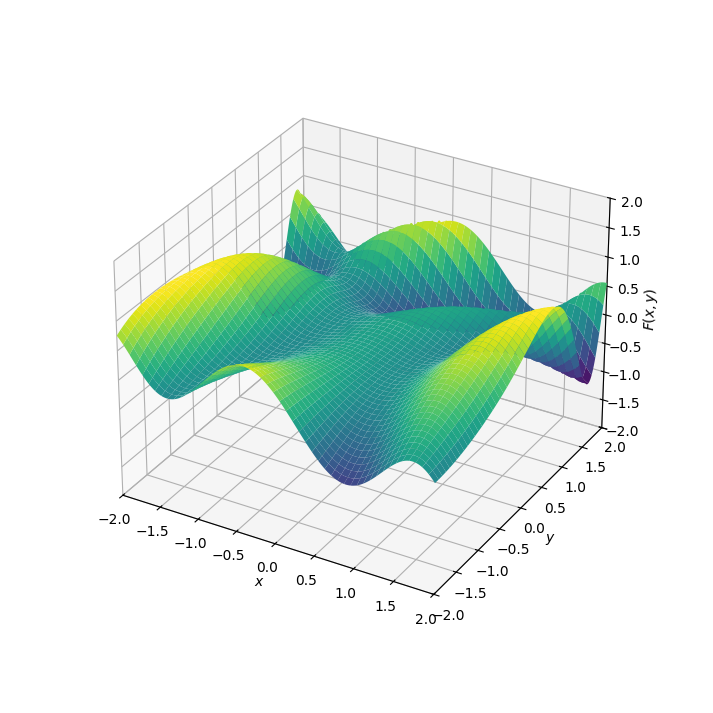

In [32]:
F = lambda x,y: np.sin(0.5*x**2. - 0.25*y**2. + 3)*np.cos(2*x + 1 - np.exp(y))
x,y = np.meshgrid(np.linspace(-2,2,1000),np.linspace(-2,2,1000))
z = F(x,y)

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap = "viridis")
ax.set(xlim=[-2, 2], ylim=([-2, 2]), zlim=([-2, 2]),
   xlabel=(r' $x$'), ylabel=(r'$y$'), zlabel=(r'$F(x,y)$'))
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

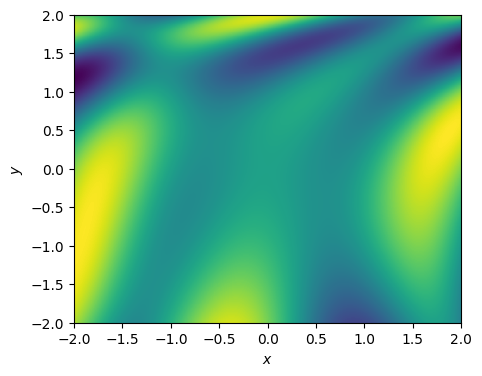

In [33]:
plt.figure(figsize=(5,4))
plt.pcolor(x, y, z, cmap = "viridis")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Para implementar el método del gradiente descendiente en dos dimensiones, se creó la función `GD_2V`, la cual se encuentra en la sección de funciones.

In [34]:
x_s,y_s = sp.symbols('x y')
F_s = sp.sin((1/2)*x_s**2-(1/4)*y_s**2+3)*sp.cos(2*x_s + 1 - sp.exp(y_s))
F_sx = sp.lambdify((x_s, y_s), sp.diff(F_s,x_s))   #Derivada de F con respecto a x.
F_sy = sp.lambdify((x_s, y_s), sp.diff(F_s,y_s))   #Derivada de F con respecto a y.

print('La función tiene un mínimo local en [x y] = {}'.format(GD_2V(np.array([-1.5,0.5]),F,F_sx,F_sy,0.1,1e-4)[0]))

La función tiene un mínimo local en [x y] = [-2.02502983  1.17467652]


**8.** Empleando los datos `X = np.linspace(0, 1, 100)` y `y = 0.2 + 0.2*X + 0.02*np.random.random(100)`, y las herramientas desarrolladas en los apartados anteriores, construya un algorítmo que permita determinar una regresión lineal.

El algoritmo para determinar la regresión lineal se encuentra en la función `Lin_Reg` que está en la sección de funciones. En la siguiente celda de código se pondrá a prueba.

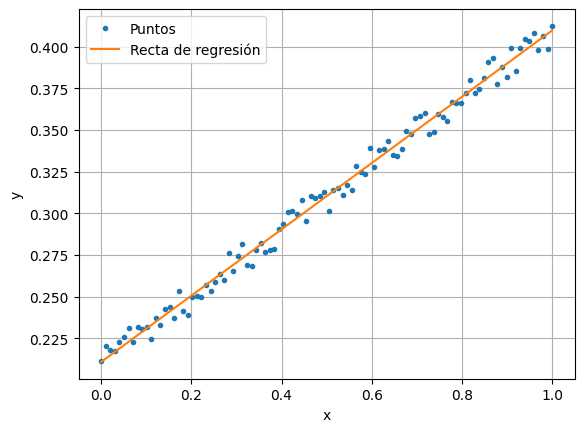

In [35]:
x8 = np.linspace(0,1,100)
y8 = 0.2 + 0.2*x8 + 0.02*np.random.random(100)

b, m = Lin_Reg(np.array([3,4]),0.1,1e-10,x8,y8)
R2 = r2_score(y8,b+m*x8)   #Valor de R^2 para esta aproximación.

plt.plot(x8,y8,'.',label='Puntos')
plt.plot(x8,b+m*x8,label='Recta de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

**9.** Compare su resultado empleando la libreria `LinearRegresion()` de sklearn.

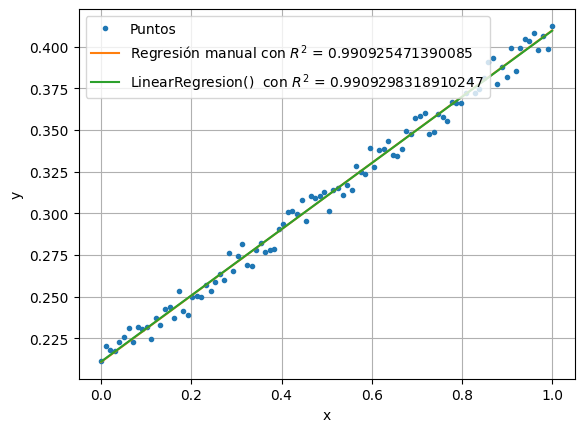

In [36]:
clf = LinearRegression()
clf.fit(x8.reshape(-1, 1),y8)
b_r, m_r = clf.intercept_,clf.coef_[0]
R2_r = clf.score(x8.reshape(-1, 1),y8)

plt.plot(x8,y8,'.',label='Puntos')
plt.plot(x8,b+m*x8,label='Regresión manual con $R^2$ = {}'.format(R2))
plt.plot(x8,b_r+m_r*x8,label='LinearRegresion()  con $R^2$ = {}'.format(R2_r))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

Como se puede ver en el gráfico anterior, las rectas prácticamente se solapan por completo, lo que quiere decir que ambos resultados son muy similares. Además, los coeficientes $R^2$ son iguales hasta cierta cifra decimal, a partir de tal cifra decimal el coeficiente $R^2$ de `LinearRegresion()` es más grande, lo que quiere decir que dicho modelo se ajusta mejor a los datos. Para obtener un mejor ajuste con el método del gradiente descendente, basta con hacer más pequeña la tolerancia $\epsilon$ que marca el fin de las iteraciones.